## 경사하강법

In [1]:
# 필요 라이브러리 선언
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
# 학습용 데이터 준비
from sklearn.datasets import load_boston

boston = load_boston()
x_origin, yt = boston.data, boston.target
feature_names = boston.feature_names

# RM 데이터
x_data = x_origin[:, feature_names == 'RM']

# 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis = 1)

### 데이터 확인

In [11]:
# 입력 데이터 x를 표시
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [12]:
# 정답값 표시
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


In [15]:
# 예측함수 (1, x)의 값에서 예측값 yp 계산

def pred(x, w):
    return (x @ w)

### 초기화 처리

In [25]:
# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수(더미 변수 포함)
D = x.shape[1]


# 반복횟수
iters = 50000

# 학습률
alpha = 0.01

In [26]:
# 가중치 벡터의 초깃값(모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록(손실함수의 값만 기록)
history = np.zeros((0,2))

### 주요 처리

In [27]:
# 반복 루프

for k in range(iters):
    
    # 예측값
    yp = pred(x, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 1000 == 0):
        # 손실함숫값의 꼐산
        loss = np.mean(yd**2) / 2
        
        # 계산 결과 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print("iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 1000 loss = 28.096145
iter = 2000 loss = 26.750372
iter = 3000 loss = 25.692265
iter = 4000 loss = 24.860333
iter = 5000 loss = 24.206231
iter = 6000 loss = 23.691946
iter = 7000 loss = 23.287592
iter = 8000 loss = 22.969671
iter = 9000 loss = 22.719707
iter = 10000 loss = 22.523174
iter = 11000 loss = 22.368651
iter = 12000 loss = 22.247158
iter = 13000 loss = 22.151635
iter = 14000 loss = 22.076530
iter = 15000 loss = 22.017479
iter = 16000 loss = 21.971051
iter = 17000 loss = 21.934547
iter = 18000 loss = 21.905846
iter = 19000 loss = 21.883280
iter = 20000 loss = 21.865537
iter = 21000 loss = 21.851587
iter = 22000 loss = 21.840619
iter = 23000 loss = 21.831996
iter = 24000 loss = 21.825215
iter = 25000 loss = 21.819884
iter = 26000 loss = 21.815693
iter = 27000 loss = 21.812398
iter = 28000 loss = 21.809806
iter = 29000 loss = 21.807769
iter = 30000 loss = 21.806168
iter = 31000 loss = 21.804908
iter = 32000 loss = 21.803918
iter = 33000 loss = 21

In [28]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800337


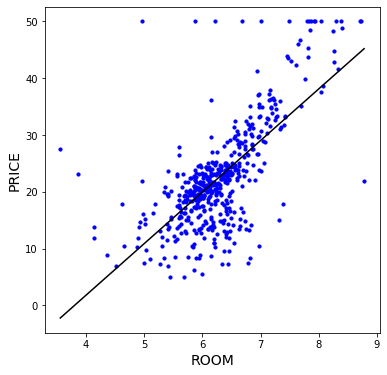

In [29]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel()
x1 = np.array([[1, xall.min()], [1, xall.max()]])
y1 = pred(x1, w)

# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize = 14)
plt.ylabel('PRICE', fontsize = 14)
plt.plot(x1[:, 1], y1, c = 'k')
plt.show()

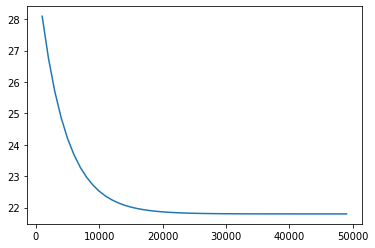

In [30]:
# 학습 곡선의 표시
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 다중회귀

In [41]:
# 열 추가
x_add = x_origin[:, feature_names == 'LSTAT']

x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [42]:
# 입력 데이터 x 표시 (더미 데이터 포함)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [50]:
M = x2.shape[0]
D = x2.shape[1]

iters = 2000

alpha = 0.001

w = np.ones(D)

history = np.zeros((0,2))

In [51]:
for k in range(iters):
    
    yp = pred(x2, w)
    
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        
        loss = np.mean(yd**2)/2
        
        history = np.vstack((history, np.array([k, loss])))
        
        print(f"iter = {k} loss = {loss}")

iter = 0 loss = 112.0639816077075
iter = 100 loss = 25.358934200838437
iter = 200 loss = 16.39105485058605
iter = 300 loss = 15.403015477091873
iter = 400 loss = 15.294135006632079
iter = 500 loss = 15.282113695594543
iter = 600 loss = 15.280763630069561
iter = 700 loss = 15.28058927258608
iter = 800 loss = 15.280544476062445
iter = 900 loss = 15.280513983829715
iter = 1000 loss = 15.280485097737488
iter = 1100 loss = 15.280456418763167
iter = 1200 loss = 15.280427792737308
iter = 1300 loss = 15.280399202639066
iter = 1400 loss = 15.280370646557646
iter = 1500 loss = 15.280342124247017
iter = 1600 loss = 15.28031363564459
iter = 1700 loss = 15.280285180708036
iter = 1800 loss = 15.280256759397291
iter = 1900 loss = 15.280228371672589


In [52]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.280228


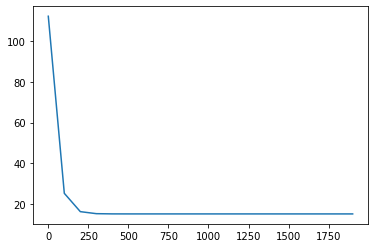

In [53]:
# 학습 곡선
plt.plot(history[:, 0], history[:,1])
plt.show()

# 로지스틱 회귀 모델(이진 분류)

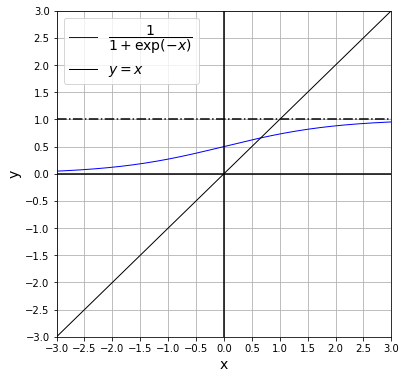

In [56]:
# 시그 모이드 함수 그래프

xx = np.linspace(-6, 6, 500)
yy = 1 / (np.exp(-xx) + 1)

plt.figure(figsize=(6,6))
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

plt.plot(xx, yy, c='b', label=r'$\dfrac{1}{1+\exp{(-x)}}$', lw=1)
plt.plot(xx, xx, c='k', label=r'$y = x$', lw=1)
plt.plot([-3,3], [0,0], c='k')
plt.plot([0,0], [-3,3],c='k')
plt.plot([-3,3],[1,1],linestyle='-.',c='k')
plt.legend(fontsize=14)
plt.show()

## 아리리스 분류

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('원본 데이터', x_org.shape, y_org.shape)

원본 데이터 (150, 4) (150,)


In [58]:
# 데이터 추출

x_data, y_data = iris.data[:100, :2], iris.target[:100]
print('대상 데이터', x_data.shape, y_data.shape)

대상 데이터 (100, 2) (100,)


In [59]:
# 더미 변수 추가
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('더미 변수를 추가 한 후', x_data.shape)

더미 변수를 추가 한 후 (100, 3)


In [60]:
# 학습 데이터, 검증 데이터 분할(셔플도 함께 실시)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=70, test_size=30, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 3) (30, 3) (70,) (30,)


In [61]:
# 학습용 변수 설정
x = x_train
yt = y_train

In [62]:
# 시그모이드 함수

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 예측값 계산

def pred(x, w):
    return sigmoid(x @ w)

In [67]:
# 손실함수(교차 엔트로피 함수)

def cross_entropy(yt, yp):
    ce1 = -(yt * np.log(yp) + (1-yt)*(np.log(1-yp)))
    
    # 교차 엔트로피 벡터의 평균값 계산
    return (np.mean(ce1))

In [68]:
# 예측 결과의 확률값에서 0이나 1을 판단하는 함수

def classify(y):
    return np.where(y < 0.5, 0, 1)

In [69]:
# 모델 평가 함수
from sklearn.metrics import accuracy_score

def evaluate(xt, yt, w):
    
    # 예측값 계산
    yp = pred(xt, w)
    
    # 손실함수 값 계산
    loss = cross_entropy(yt, yp)
    
    # 예측값(확률값)을 0이나 1로 변환
    yp_b = classify(yp)
    
    # 정확도 산출
    score = accuracy_score(yt, yp_b)
    return loss, score

### 초기화 처리

In [73]:
# 표본 수 
M = x.shape[0]
# 입력 차원 수(더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 10000

# 학습률
alpha = 0.01

# 초깃값
w = np.ones(D)

# 평가 결과 기록(손실함수와 정확도)
history = np.zeros((0,3))

### 주요 처리

In [74]:
# 반복 루프

for k in range(iters):
    
    # 예측값 계산
    yp = pred(x, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x.T @ yd) / M
    
    # 평가 기록
    if (k % 100 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, np.array([k, loss, score])))
        print(f"iter = {k} loss = {loss} score = {score}")

iter = 0 loss = 4.4938418186342695 score = 0.5
iter = 100 loss = 0.7409788485045926 score = 0.13333333333333333
iter = 200 loss = 0.6774930581665342 score = 0.7
iter = 300 loss = 0.6235435809786555 score = 0.9
iter = 400 loss = 0.5776157672345783 score = 0.9333333333333333
iter = 500 loss = 0.5383281301748647 score = 0.9333333333333333
iter = 600 loss = 0.5045229597000369 score = 0.9333333333333333
iter = 700 loss = 0.4752489367663842 score = 0.9333333333333333
iter = 800 loss = 0.4497325546393153 score = 0.9333333333333333
iter = 900 loss = 0.42734764429053146 score = 0.9666666666666667
iter = 1000 loss = 0.40758745483268555 score = 0.9666666666666667
iter = 1100 loss = 0.39004089598350233 score = 0.9666666666666667
iter = 1200 loss = 0.374373112839896 score = 0.9666666666666667
iter = 1300 loss = 0.36030994853028453 score = 0.9666666666666667
iter = 1400 loss = 0.3476256598076243 score = 0.9666666666666667
iter = 1500 loss = 0.336133254886928 score = 0.9666666666666667
iter = 1600 lo

In [75]:
# 손실함수의 값과 정확도 점검

print(f'[초기 상태] 손실함수: {history[0,1]}, 정확도: {history[0,2]}')
print(f'[최종 상태] 손실함수: {history[-1,1]}, 정확도: {history[-1,2]}')

[초기 상태] 손실함수: 4.4938418186342695, 정확도: 0.5
[최종 상태] 손실함수: 0.15431466809749284, 정확도: 0.9666666666666667


### 산점도와 결정경계의 표시

In [76]:
# 검증 데이터
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 결정경계를 그리기 위해 x1의 값에서 x2의 값을 계산
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])

# 산점도 x1의 최솟값과 최댓값
x1 = np.asarray([x[:,1].min(), x[:,1].max()])
y1 = b(x1, w)

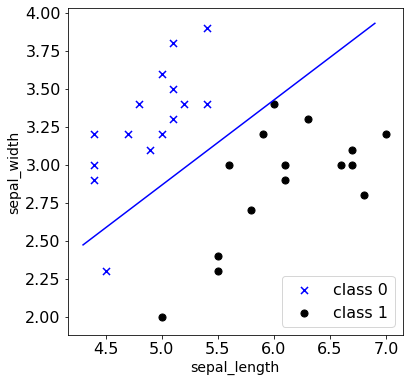

In [78]:
plt.figure(figsize=(6,6))
# 산점도 표시
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', 
        c='k', s=50, label='class 1')
# 산점도에 결정경계 직선을 추가
plt.plot(x1, y1, c='b')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

### 학습곡선 표시

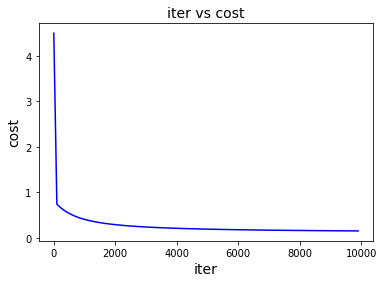

In [79]:
# 학습 곡선 표시(손실 함수)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

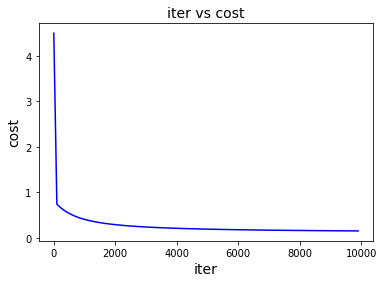

In [80]:
# 학습 곡선 표시(정확도)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

## Sklearn 라이브러리 사용

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# 모델 생성
model_lr = LogisticRegression(solver='liblinear')
model_svm = svm.SVC(kernel='linear')

# 기계 학십
model_lr.fit(x, yt)
model_svm.fit(x, yt)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
# 선형 회귀
# 절편의 값
lr_w0 = model_lr.intercept_[0]
# x1(sepal_length)의 계수
lr_w1 = model_lr.coef_[0,1]
# x2(sepal_width)의 계수
lr_w2 = model_lr.coef_[0,2]

# SVM
# 절편의 값
svm_w0 = model_svm.intercept_[0]
# x1(sepal_length)의 계수
svm_w1 = model_svm.coef_[0,1]
# x2(sepal_width)의 계수
svm_w2 = model_svm.coef_[0,2]

In [85]:
# 한계 직선 그리기용 x1의 값에서 x2의 값을 계산

def r1(x):
    wk = lr_w0 + lr_w1 * x
    wk2 = -wk / lr_w2
    return (wk2)

In [88]:
# 한계 직선 그리기용 x1의 값에서 x2의 값을 꼐산

def svm(x):
    wk = svm_w0 + svm_w1 * x
    wk2 = -wk / svm_w2
    return (wk2)

In [89]:
y_r1 = r1(x1)
y_svm = svm(x1)

# 결과 확싱ㄴ
print(x1, y1, y_r1, y_svm)

[4.3 6.9] [2.47353128 3.93052473] [2.50344682 4.05984593] [2.17911792 4.42574136]


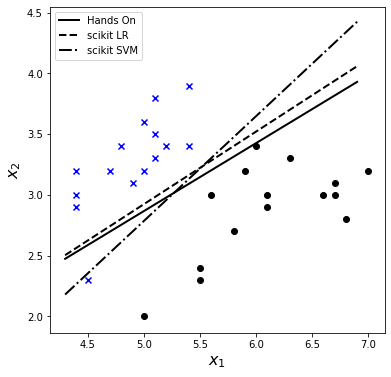

In [91]:
# 산점도에 한계 직선 추가
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
# 산점도의 표시
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k')
# 한계 직선의 표시
ax.plot(x1, y1, linewidth=2, c='k', label='Hands On')
# lr model
ax.plot(x1, y_r1, linewidth=2, c='k', linestyle="--", label='scikit LR')
# svm
ax.plot(x1, y_svm, linewidth=2, c='k', linestyle="-.", label='scikit SVM')

ax.legend()
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
plt.show()